In [99]:
import pandas as pd
import wandb
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

In [100]:
import os

os.environ['WANDB_API_KEY']='efa35d20c95d9e87a562af4e0e3091bd1427851c'

In [101]:
#RSA
def get_runs(runs, model_alias):
    data = []
    for i, run in enumerate(runs):
        summary = run.summary._json_dict
        try:
            metrics = {"RSA-value": summary["rsascore"]}
        except:
            print(i)
            print(summary)
        # RSA Harry Potter
        if model_alias == "ft":
            res = {"name": run.name, **metrics, "Layers": run.tags[0], "Subjects": run.tags[2], "Models": run.tags[1]}
        elif model_alias == "bert":
            res = {"name": run.name, **metrics, "Layers": run.tags[-2], "Subjects": run.tags[-1], "Models":run.tags[0]}
        elif model_alias == "gpt2":
            res = {"name": run.name, **metrics, "Layers": run.tags[-2], "Subjects": run.tags[-1], "Models": run.tags[-3]}
        elif model_alias == "opt":
            res = {"name": run.name, **metrics, "Layers": run.tags[-3], "Subjects": run.tags[-1], "Models": run.tags[-2]}
        else:
            print("Please choose the correct model result.")
        

        data.append(res)
    return data

In [102]:
def export_df(dataname, method):
    api = wandb.Api()
    df_bert = pd.DataFrame(get_runs(api.runs(path=f"brainlm/{dataname}-brain2bert_{method}_averaged"), "bert"))
    # df_ft = pd.DataFrame(get_runs(api.runs(path=f"brainlm/{dataname}-brain2fasttext_{method}_averaged"), "ft"))
    df_gpt2 = pd.DataFrame(get_runs(api.runs(path=f"brainlm/{dataname}-brain2gpt2_{method}_averaged"), "gpt2"))
    df_opt = pd.DataFrame(get_runs(api.runs(path=f"brainlm/{dataname}-brain2opt_{method}_averaged"), "opt"))
    # df_gpt = pd.concat([df_gpt2, df_opt], axis="index").reset_index().round(2)
    
    # return df_ft

    # return {0:df_bert}
    return df_bert, df_gpt2, df_opt

In [103]:
# method = "procrustes"
# method = "regression"
method = "rsa"
if method == "procrustes":
    METHOD = "Procrustes Analysis" 
    
elif method == "rsa":
    METHOD = "RSA"
else:
    METHOD = "Ridge Regression"
MODEL_NAME = {'bert_uncased_L-2_H-128_A-2': "BERT$_{\\text{TINY}}$",
                'bert_uncased_L-4_H-256_A-4': "BERT$_{\\text{MINI}}$" ,
                'bert_uncased_L-4_H-512_A-8': "BERT$_{\\text{SMALL}}$",
                'bert_uncased_L-8_H-512_A-8': "BERT$_{\\text{MEDIUM}}$",
                'bert-base-uncased': "BERT$_{\\text{BASE}}$",
                'bert-large-uncased': "BERT$_{\\text{LARGE}}$",
                'gpt2': "GPT2$_{\\text{BASE}}$",
                'gpt2-medium': "GPT2$_{\\text{MEDIUM}}$",
                'gpt2-large': "GPT2$_{\\text{LARGE}}$",
                'gpt2-xl': "GPT2$_{\\text{XL}}$",
                'opt-125m': "OPT$_{\\text{125M}}$",
                'opt-1': "OPT$_{\\text{1.3B}}$",
                'opt-6': "OPT$_{\\text{6.7B}}$",
                'opt-30b': "OPT$_{\\text{30B}}$",
                "fasttext":"fastText"}
rsa_df_res = export_df("potter", method)
# df_res = export_df("nat_stories", method)

/var/folders/1f/39ghglgs5lg_2lcpr541vc8m0000gn/T/ipykernel_17446/442554815.py:66: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs.set_xticklabels(x, rotation=45)


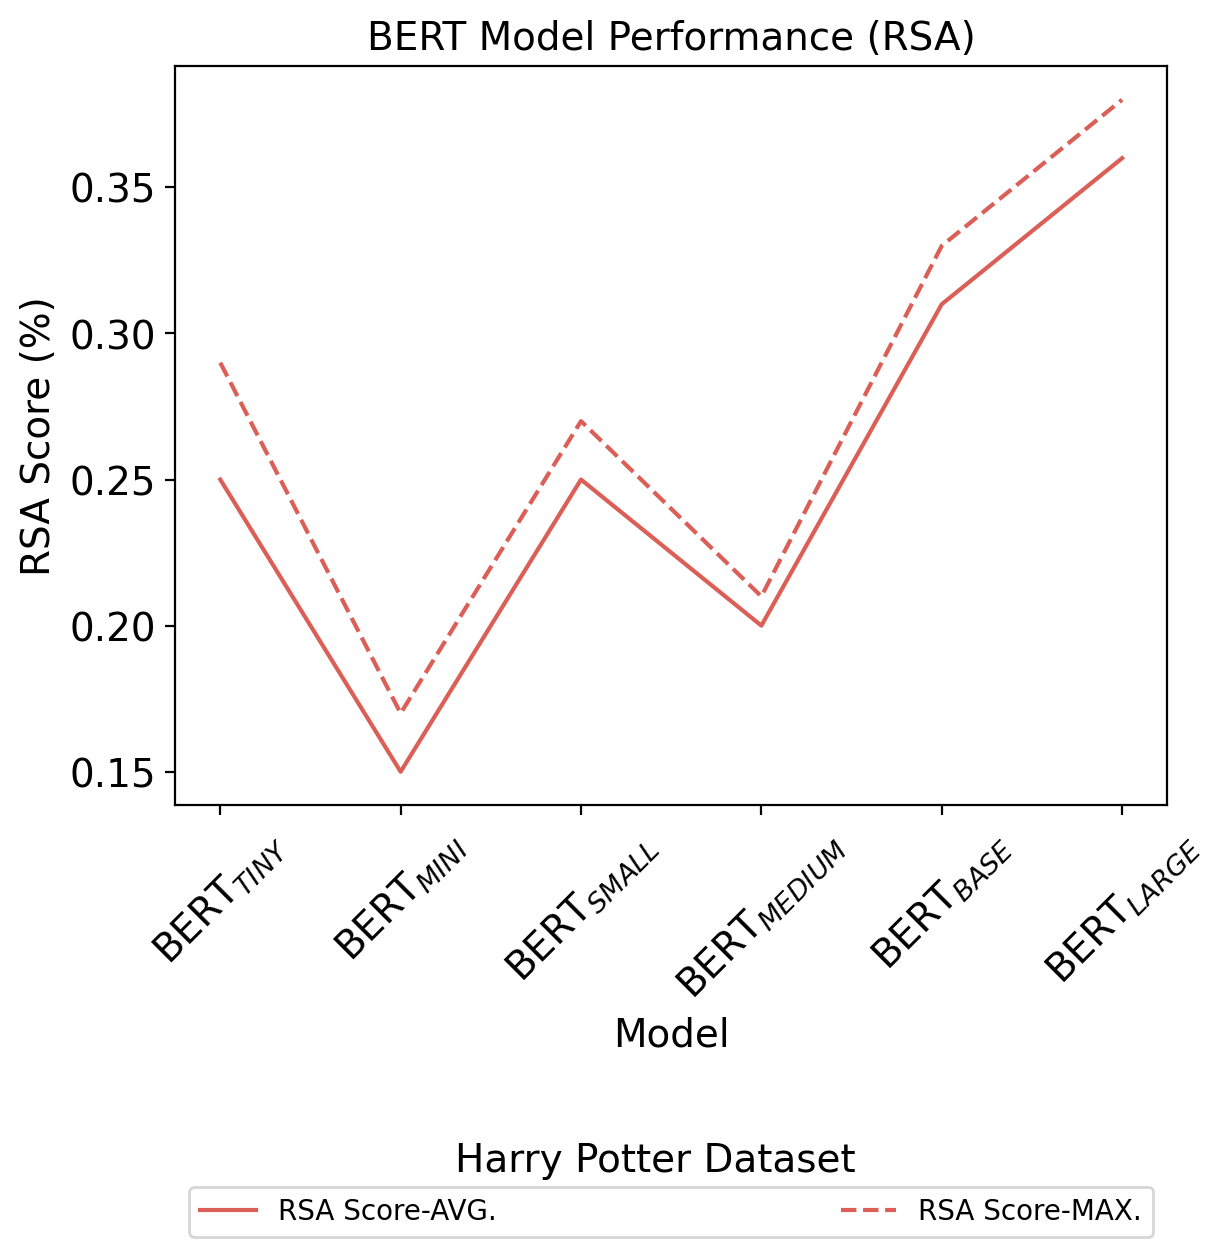

/var/folders/1f/39ghglgs5lg_2lcpr541vc8m0000gn/T/ipykernel_17446/442554815.py:66: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs.set_xticklabels(x, rotation=45)


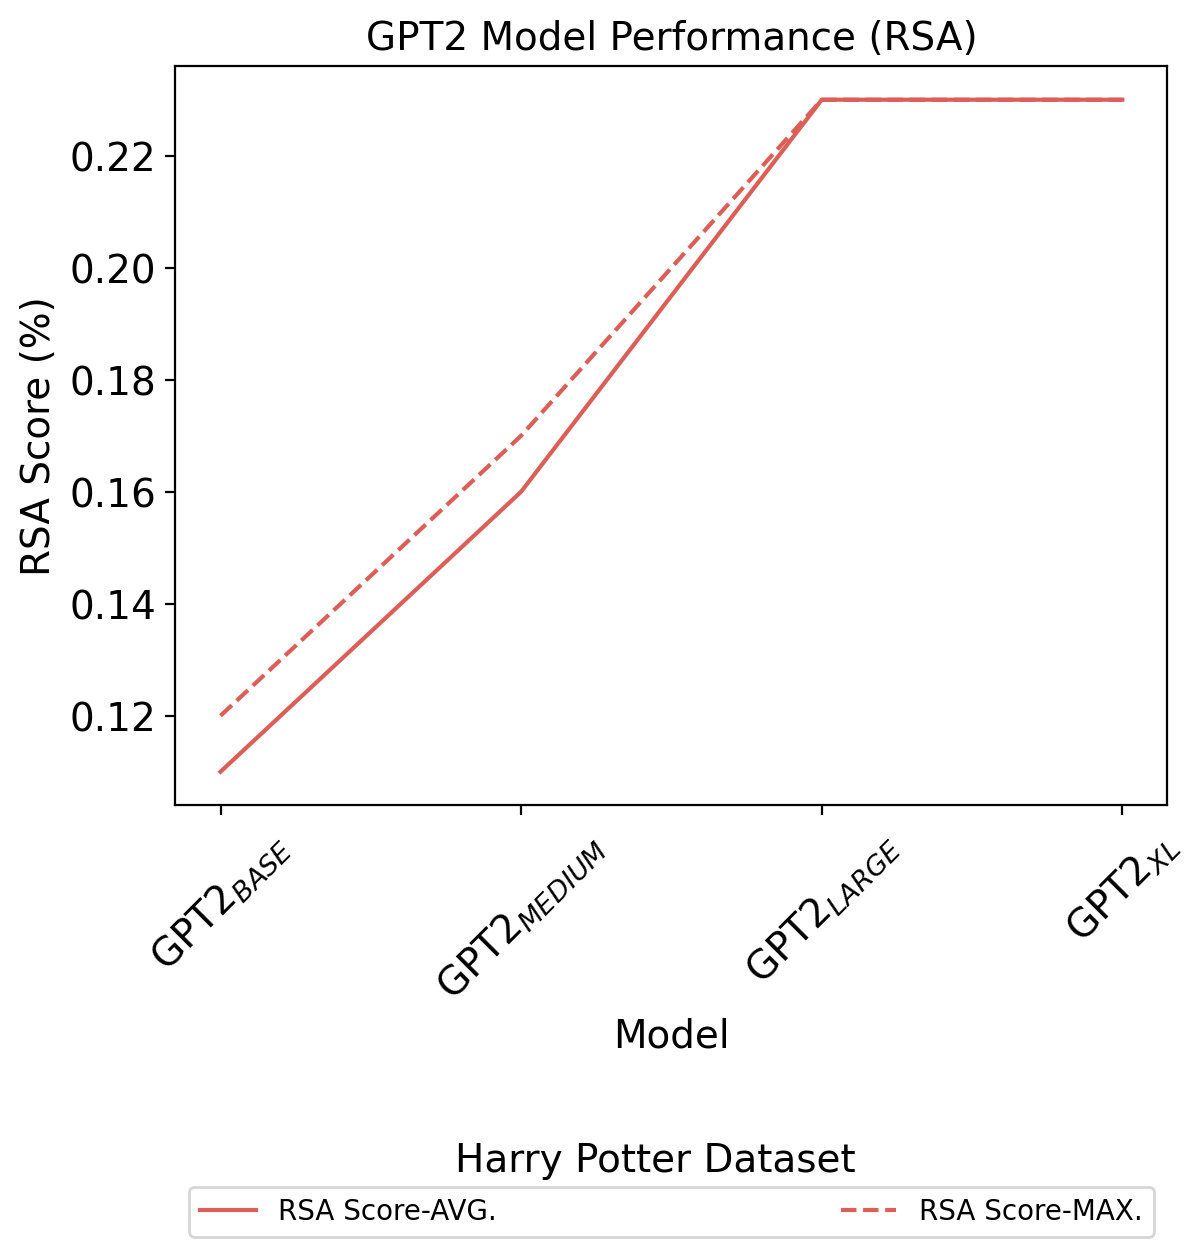

/var/folders/1f/39ghglgs5lg_2lcpr541vc8m0000gn/T/ipykernel_17446/442554815.py:66: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs.set_xticklabels(x, rotation=45)


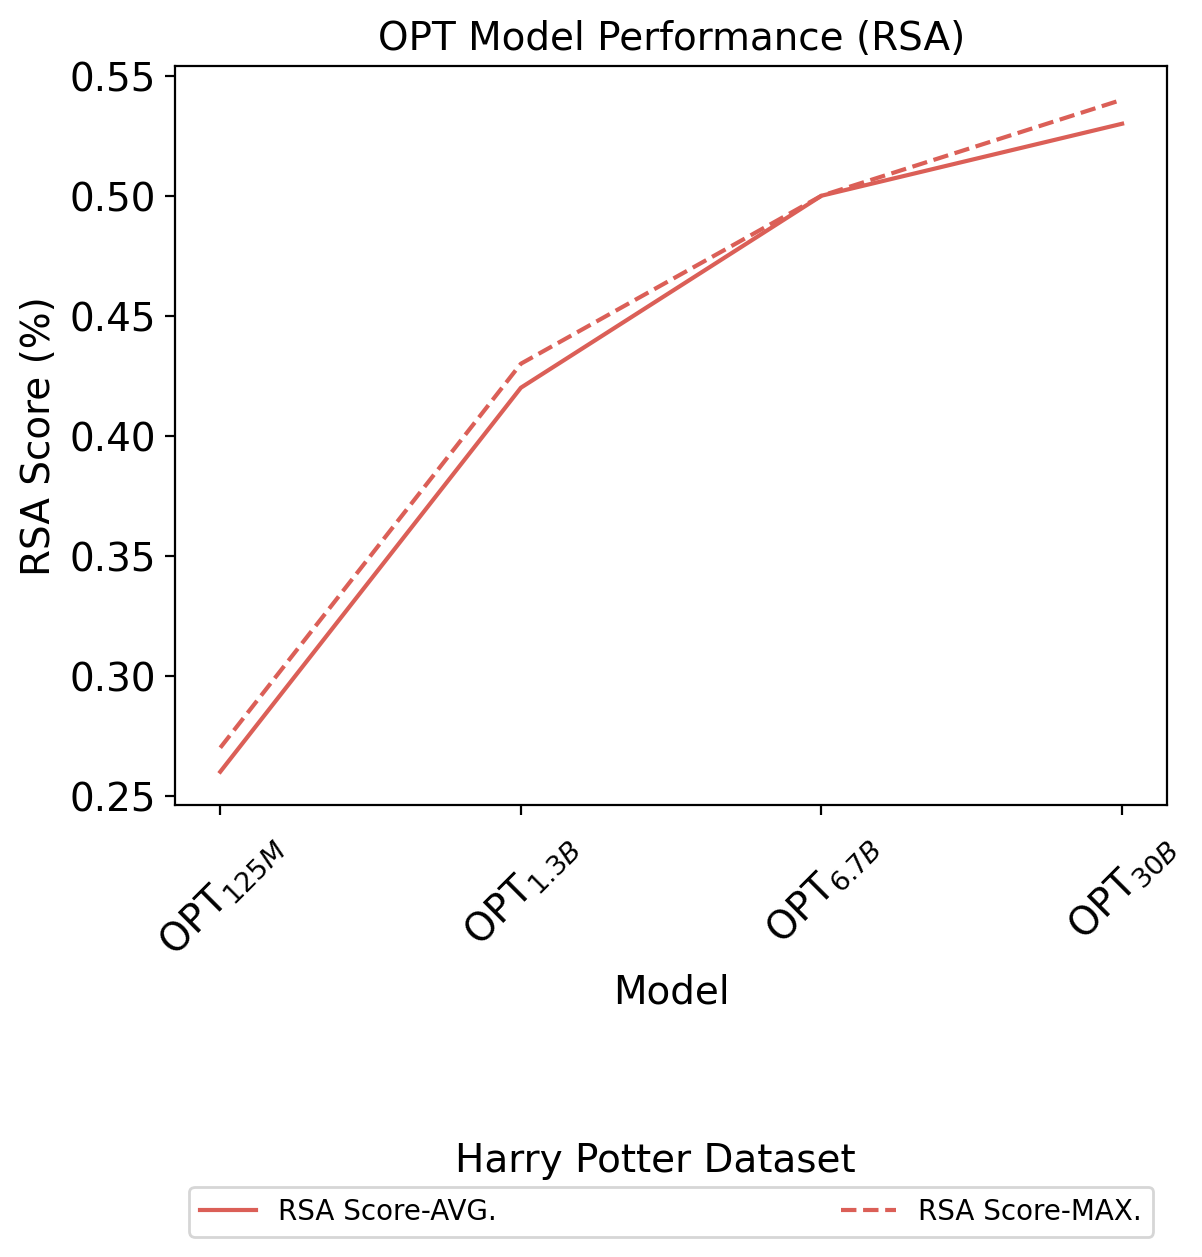

In [139]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path


# Define the plot figure and axes
# fig, axs = plt.subplots(nrows=1, ncols=len(rsa_df_res), sharey=True, dpi=250, figsize=(25, 8), gridspec_kw={'wspace': 0, 'hspace': 0.2})
# fig, axs = plt.subplots(nrows=1, ncols=len(rsa_df_res), sharey=True, dpi=200, figsize=(21, 8), gridspec_kw={'wspace': 0.05, 'hspace': 0.2})
# Define color palette
colors = sns.color_palette("pastel", 6)
data_name = "Harry Potter"

for model_type, df in enumerate(rsa_df_res):
# for model_type, df in enumerate(rsa_df_res.values()):
    if model_type == 0:
        x = [r"BERT$_{TINY}$", r"BERT$_{MINI}$" , r"BERT$_{SMALL}$", r"BERT$_{MEDIUM}$", r"BERT$_{BASE}$", r"BERT$_{LARGE}$"]
        model_name = "BERT"
        id_order = [2,3,4,5,0,1]
    elif model_type == 1:
        x = [r"GPT2$_{BASE}$", r"GPT2$_{MEDIUM}$", r"GPT2$_{LARGE}$", r"GPT2$_{XL}$"]
        model_name = "GPT2"
        id_order = [0,2,1,3]
    else:
        x = [r"OPT$_{125M}$", r"OPT$_{1.3B}$", r"OPT$_{6.7B}$", r"OPT$_{30B}$"]
        model_name = "OPT"
        id_order = [1,0,3,2]

   
    #layer_avg = df.groupby(["Models"])[["RSA-value"]].mean()
    layer_avg = df.groupby(["Models", "Layers"])["RSA-value"].mean().reset_index()
    layer_avg = layer_avg.groupby(["Models"])["RSA-value"].max().reset_index()
    layer_avg.insert(loc=layer_avg.columns.get_loc("Models"), column="Summary",
                        value=[f"Ave Max."]*len(x))
    
    layer_ = df.groupby(["Models", "Layers", "Subjects"])["RSA-value"].mean().reset_index()
    layer_max = layer_.groupby(["Models"])["RSA-value"].max().reset_index()
    layer_max.insert(loc=layer_max.columns.get_loc("Models"), column="Summary",
                        value=[f"Single Max."]*len(x))

    # print(layer_avg)
    # print(layer_max)

 
    save_dir = Path("./figures")
    save_dir.mkdir(parents=True, exist_ok=True)

    # Set the Y-axis
    y_avg = layer_avg.reindex(index=id_order).iloc[:, 2:].round(2)

    y_max = layer_max.reindex(index=id_order).iloc[:, 2:].round(2)
    
    fig, axs = plt.subplots(nrows=1, ncols=1, sharex=True, dpi=200)
    # axs = fig.add_subplot(1, len(rsa_df_res), model_type+1)
    colors = sns.color_palette("hls", 4)

    for idx, name in enumerate(y_avg.columns.values[:6]):
        axs.plot(x, y_avg[name], label=f"RSA Score-AVG.", ls="-", color=colors[idx])
    for idx, name in enumerate(y_avg.columns.values[:6]):
        axs.plot(x, y_max[name], label=f"RSA Score-MAX.", ls="--", color=colors[idx])

    axs.tick_params(axis='x', labelsize=14)
    axs.tick_params(axis='y', labelsize=14)
    axs.legend(bbox_to_anchor=(0., -0.5, 1., -.10), loc='center',
                ncol=2, mode="expand", borderaxespad=0.5, fontsize=10)
    axs.set_xticklabels(x, rotation=45)
    axs.set_title(f"{model_name} Model Performance ({METHOD})",fontsize=14)
    axs.set_xlabel("Model",fontsize=14)
    axs.set_ylabel(f"RSA Score (%)",fontsize=14)
    fig.supxlabel(f"{data_name} Dataset", fontsize=14).set_position((0.5, -0.28))
    plt.savefig(f'./{save_dir}/{model_name}-{method}.pdf', bbox_inches='tight')
    plt.show()

    # Plot the averaged value line
    # axs[0][model_type].plot(x, y_avg, label="Ave Max.", ls="-", color=colors[0])

    # # Plot the maximum value line
    # axs[0][model_type].plot(x, y_max, label="Single Max.", ls="--", color=colors[1])

    # axs[0][model_type].tick_params(axis='y', labelsize=14)

    # plt.show()
